<a href="https://colab.research.google.com/github/calvinadoho/Projet-ML-TNT/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import drive

In [4]:
drive.mount('/gdrive')
os.listdir("/gdrive/MyDrive/Résultats TNT")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


['Base_Complete_avec_RxPower_dBm_New.xlsx',
 'Data_remplies.csv',
 'data_encoded.csv',
 'base_équilibrée.csv',
 'Base_finale_CTGAN_10000.csv',
 'Base_de_données_outliers.csv',
 'Base_filtrée_univariée.csv',
 'Data_standardisé.csv',
 'Data_variables_selectionnees.csv',
 'Data_PCA.csv']

In [5]:
Data=pd.read_csv("/gdrive/MyDrive/Résultats TNT/Data_PCA.csv")
Data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,E_field
0,-2.111271,-0.247304,1.070981,0.553783,0.287504,-2.229954,-0.922203,0.118151,-0.324045
1,-2.208558,0.038363,-0.233987,-0.230707,-0.956352,-2.020335,0.237596,-0.577264,-1.824576
2,-2.468489,0.056295,-0.244166,-0.399053,-0.740155,-1.437839,0.285170,-0.395749,-1.518170
3,-2.509049,-0.475154,0.520031,0.808841,-0.241585,-2.171191,-0.853508,0.300095,-1.137067
4,-2.648440,-0.404431,-0.811360,-0.475061,-0.247260,-1.420511,-1.248990,0.031056,-0.783535
...,...,...,...,...,...,...,...,...,...
10463,-4.030350,-0.389437,-0.498695,1.345734,1.890932,-0.043543,1.018912,-0.058483,-0.596718
10464,-3.889530,-0.786047,-0.777678,0.168238,-0.829007,-0.618072,-0.060364,-0.083074,-1.824576
10465,-2.223830,0.356774,1.383381,-0.246851,0.256425,-0.954783,-0.539971,0.637355,0.000283
10466,-4.540013,-0.650508,-1.448381,0.274967,-0.225989,0.366586,0.522989,-0.161374,-1.824576


**REGRESSION LINEAIRE**

Résultats moyens Régression Linéaire :
    sample_size   R2_test  RMSE_test  R2_train  RMSE_train
0           500  0.987231   0.108199  0.989012    0.104481
1          1000  0.989371   0.104108  0.988797    0.105828
2          1500  0.988551   0.105895  0.988588    0.106111
3          2000  0.988287   0.107720  0.988856    0.105729
4          2500  0.988762   0.106036  0.988579    0.106288
5          3000  0.988735   0.105919  0.988827    0.105669
6          3500  0.988785   0.105378  0.988744    0.106488
7          4000  0.988631   0.106103  0.988677    0.106215
8          4500  0.988780   0.106146  0.988651    0.106429
9          5000  0.988656   0.106454  0.988660    0.106420
10         5500  0.988637   0.106297  0.988744    0.106095
11         6000  0.988719   0.106184  0.988663    0.106419
12         6500  0.988454   0.107111  0.988667    0.106522
13         7000  0.988876   0.105825  0.988639    0.106453
14         7500  0.988700   0.106509  0.988668    0.106494
15         8000  

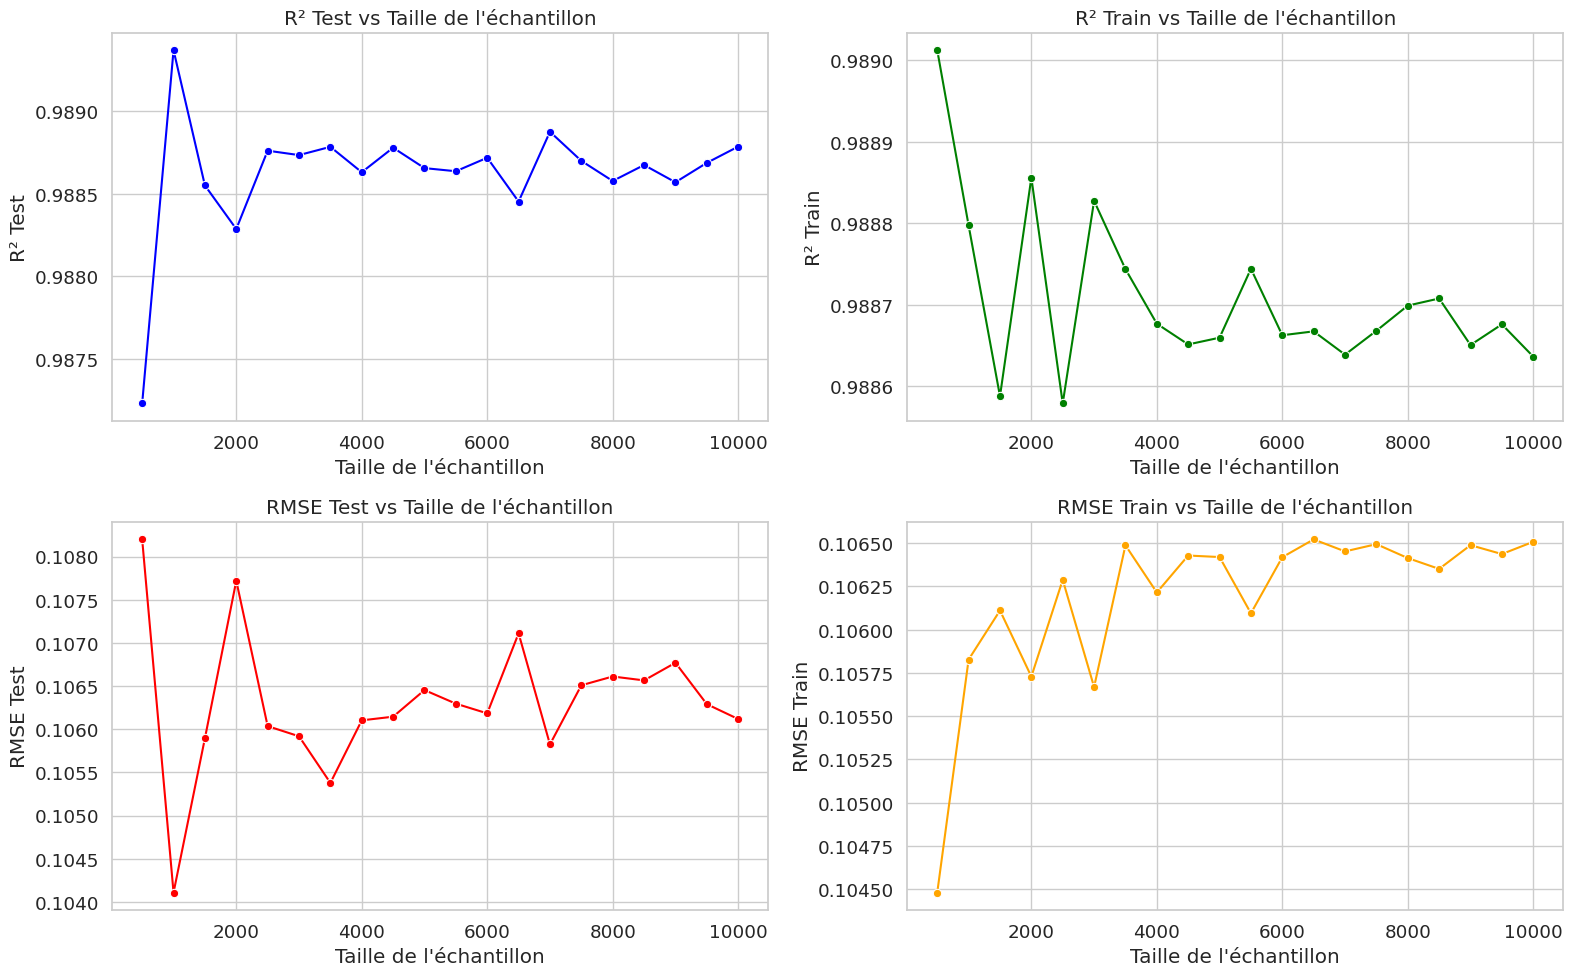

In [6]:
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Paramètres
sample_sizes = list(range(500, 10001, 500))  # 500 à 10000 par pas de 500
n_repeats = 20  # Nombre de répétitions

# Dictionnaire pour enregistrer les résultats
results_lr = {
    'sample_size': [],
    'R2_test': [], 'RMSE_test': [],
    'R2_train': [], 'RMSE_train': []
}

# Boucle sur les tailles d’échantillons
for size in sample_sizes:
    r2_test_scores = []
    rmse_test_scores = []
    r2_train_scores = []
    rmse_train_scores = []

    for _ in range(n_repeats):
        # Tirage aléatoire sans remplacement
        sample_indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[sample_indices]
        y_sample = y.iloc[sample_indices]

        # Split train/test
        X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=None)

        # Modèle
        modelRL = LinearRegression()
        modelRL.fit(X_train, y_train)

        # Prédictions test
        y_pred_test = modelRL.predict(X_test)
        r2_test_scores.append(r2_score(y_test, y_pred_test))
        rmse_test_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

        # Prédictions train
        y_pred_train = modelRL.predict(X_train)
        r2_train_scores.append(r2_score(y_train, y_pred_train))
        rmse_train_scores.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))

    # Moyenne des scores sur les 5 répétitions
    results_lr['sample_size'].append(size)
    results_lr['R2_test'].append(np.mean(r2_test_scores))
    results_lr['RMSE_test'].append(np.mean(rmse_test_scores))
    results_lr['R2_train'].append(np.mean(r2_train_scores))
    results_lr['RMSE_train'].append(np.mean(rmse_train_scores))

# Conversion en DataFrame
df_results_lr = pd.DataFrame(results_lr)

# Affichage des résultats
print("Résultats moyens Régression Linéaire :")
print(df_results_lr)

# Visualisation avec 4 graphiques
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(16, 10))

# R² Test
plt.subplot(2, 2, 1)
sns.lineplot(data=df_results_lr, x='sample_size', y='R2_test', marker='o', color='blue')
plt.title('R² Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Test')
plt.grid(True)

# R² Train
plt.subplot(2, 2, 2)
sns.lineplot(data=df_results_lr, x='sample_size', y='R2_train', marker='o', color='green')
plt.title('R² Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Train')
plt.grid(True)

# RMSE Test
plt.subplot(2, 2, 3)
sns.lineplot(data=df_results_lr, x='sample_size', y='RMSE_test', marker='o', color='red')
plt.title('RMSE Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Test')
plt.grid(True)

# RMSE Train
plt.subplot(2, 2, 4)
sns.lineplot(data=df_results_lr, x='sample_size', y='RMSE_train', marker='o', color='orange')
plt.title('RMSE Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Train')
plt.grid(True)

# Ajustement de l'espacement
plt.tight_layout()
plt.show()


**XGBOOST**

Résultats moyens XGBoost Regressor :
    sample_size   R2_test  RMSE_test  R2_train  RMSE_train
0           500  0.913294   0.292874  0.999999    0.001024
1          1000  0.941046   0.241015  0.999980    0.004415
2          1500  0.957483   0.204980  0.999914    0.009194
3          2000  0.964419   0.187063  0.999801    0.014083
4          2500  0.969021   0.174464  0.999665    0.018277
5          3000  0.972835   0.164018  0.999498    0.022366
6          3500  0.974360   0.159729  0.999334    0.025802
7          4000  0.976131   0.153802  0.999161    0.028947
8          4500  0.977033   0.151724  0.998995    0.031607
9          5000  0.978869   0.145243  0.998846    0.033908
10         5500  0.979439   0.142759  0.998663    0.036638
11         6000  0.980861   0.138211  0.998532    0.038352
12         6500  0.981079   0.137195  0.998381    0.040238
13         7000  0.981923   0.134614  0.998223    0.042148
14         7500  0.982950   0.130549  0.998127    0.043229
15         8000  0.

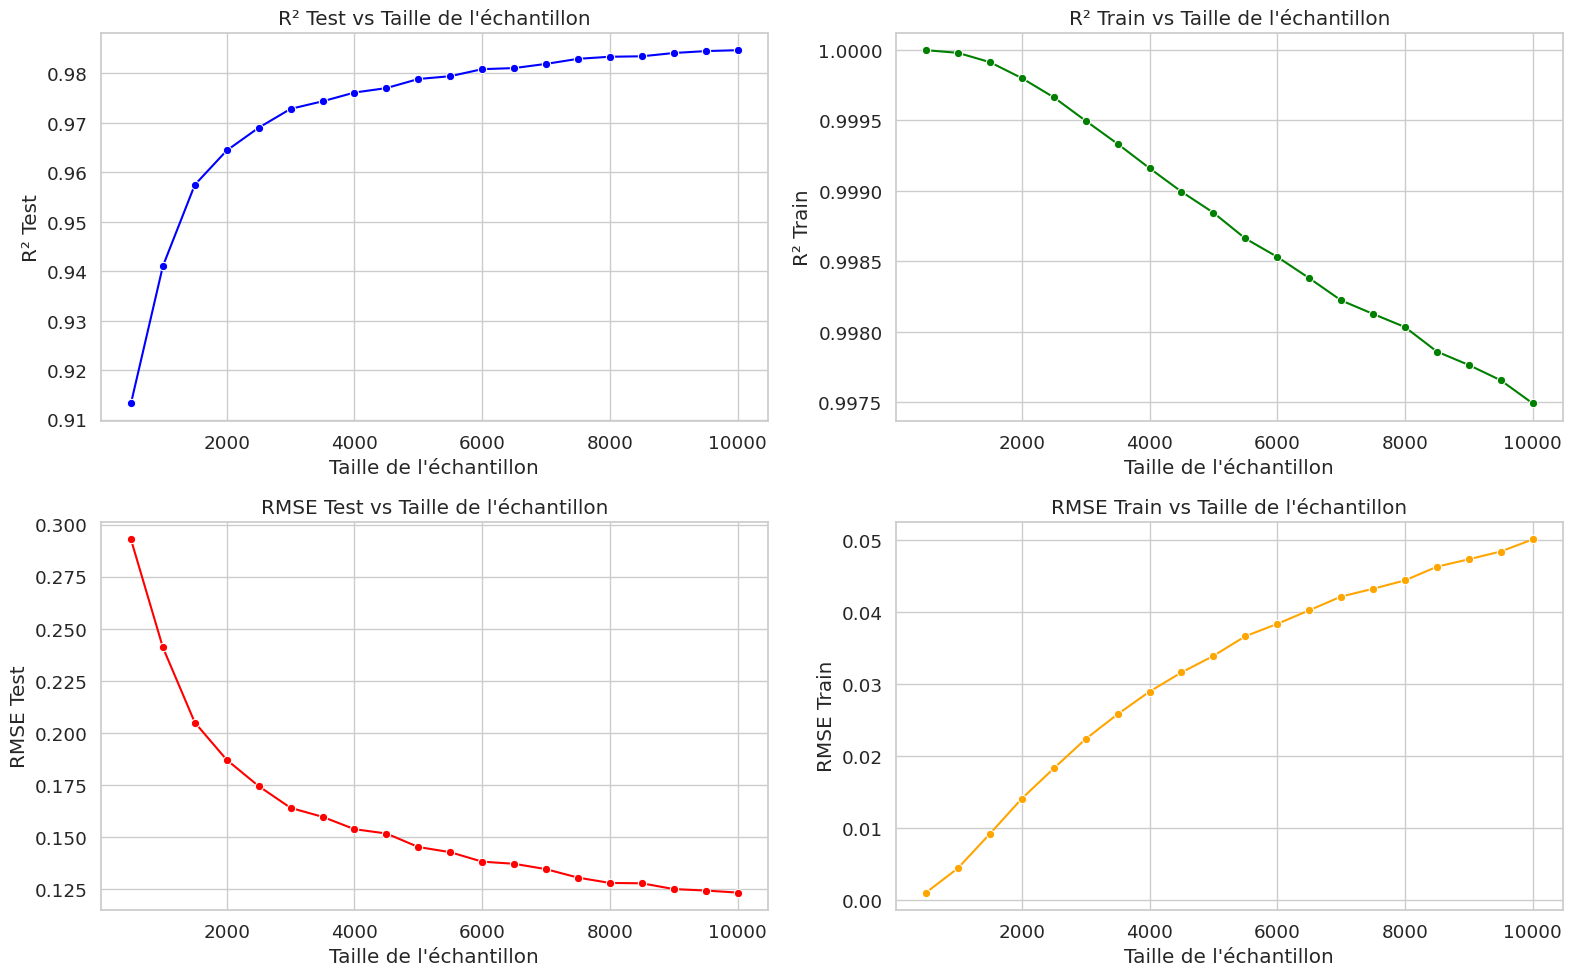

In [7]:
# Données
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Paramètres
sample_sizes = list(range(500, 10001, 500))
n_repeats = 20

# Dictionnaire des résultats
results_xgb = {
    'sample_size': [],
    'R2_test': [], 'RMSE_test': [],
    'R2_train': [], 'RMSE_train': []
}

# Boucle d'entraînement
for size in sample_sizes:
    r2_test_scores, rmse_test_scores = [], []
    r2_train_scores, rmse_train_scores = [], []

    for _ in range(n_repeats):
        # Échantillonnage aléatoire
        indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[indices]
        y_sample = y.iloc[indices]

        # Split train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X_sample, y_sample, test_size=0.2, random_state=None)

        # Modèle XGBoost
        modelXGB = XGBRegressor(objective='reg:squarederror', random_state=42)
        modelXGB.fit(X_train, y_train)

        # Prédictions test
        y_pred_test = modelXGB.predict(X_test)
        r2_test_scores.append(r2_score(y_test, y_pred_test))
        rmse_test_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

        # Prédictions train
        y_pred_train = modelXGB.predict(X_train)
        r2_train_scores.append(r2_score(y_train, y_pred_train))
        rmse_train_scores.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))

    # Moyenne sur les répétitions
    results_xgb['sample_size'].append(size)
    results_xgb['R2_test'].append(np.mean(r2_test_scores))
    results_xgb['RMSE_test'].append(np.mean(rmse_test_scores))
    results_xgb['R2_train'].append(np.mean(r2_train_scores))
    results_xgb['RMSE_train'].append(np.mean(rmse_train_scores))

# Résultats en DataFrame
df_results_xgb = pd.DataFrame(results_xgb)
print("Résultats moyens XGBoost Regressor :")
print(df_results_xgb)

# 🔽 Visualisation avec 4 graphes
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(16, 10))

# R² Test
plt.subplot(2, 2, 1)
sns.lineplot(data=df_results_xgb, x='sample_size', y='R2_test', marker='o', color='blue')
plt.title('R² Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Test')
plt.grid(True)

# R² Train
plt.subplot(2, 2, 2)
sns.lineplot(data=df_results_xgb, x='sample_size', y='R2_train', marker='o', color='green')
plt.title('R² Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Train')
plt.grid(True)

# RMSE Test
plt.subplot(2, 2, 3)
sns.lineplot(data=df_results_xgb, x='sample_size', y='RMSE_test', marker='o', color='red')
plt.title('RMSE Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Test')
plt.grid(True)

# RMSE Train
plt.subplot(2, 2, 4)
sns.lineplot(data=df_results_xgb, x='sample_size', y='RMSE_train', marker='o', color='orange')
plt.title('RMSE Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Train')
plt.grid(True)

plt.tight_layout()
plt.show()


**RANDOM FOREST**

Résultats moyens Random Forest Regressor :
    sample_size   R2_test  RMSE_test  R2_train  RMSE_train
0           500  0.905161   0.299502  0.987906    0.110325
1          1000  0.936413   0.249051  0.991081    0.094590
2          1500  0.948135   0.226128  0.992419    0.086440
3          2000  0.953478   0.212473  0.993385    0.081261
4          2500  0.955838   0.208986  0.993967    0.077648
5          3000  0.960703   0.198711  0.994437    0.074373
6          3500  0.963759   0.190492  0.994694    0.072993
7          4000  0.965706   0.184850  0.995080    0.070062
8          4500  0.966604   0.181132  0.995305    0.068617
9          5000  0.967691   0.179145  0.995425    0.067646
10         5500  0.969445   0.174338  0.995657    0.065990
11         6000  0.970624   0.172108  0.995776    0.064912
12         6500  0.972071   0.167420  0.995933    0.063750
13         7000  0.971911   0.167369  0.996029    0.063063
14         7500  0.973170   0.163445  0.996146    0.062015
15         80

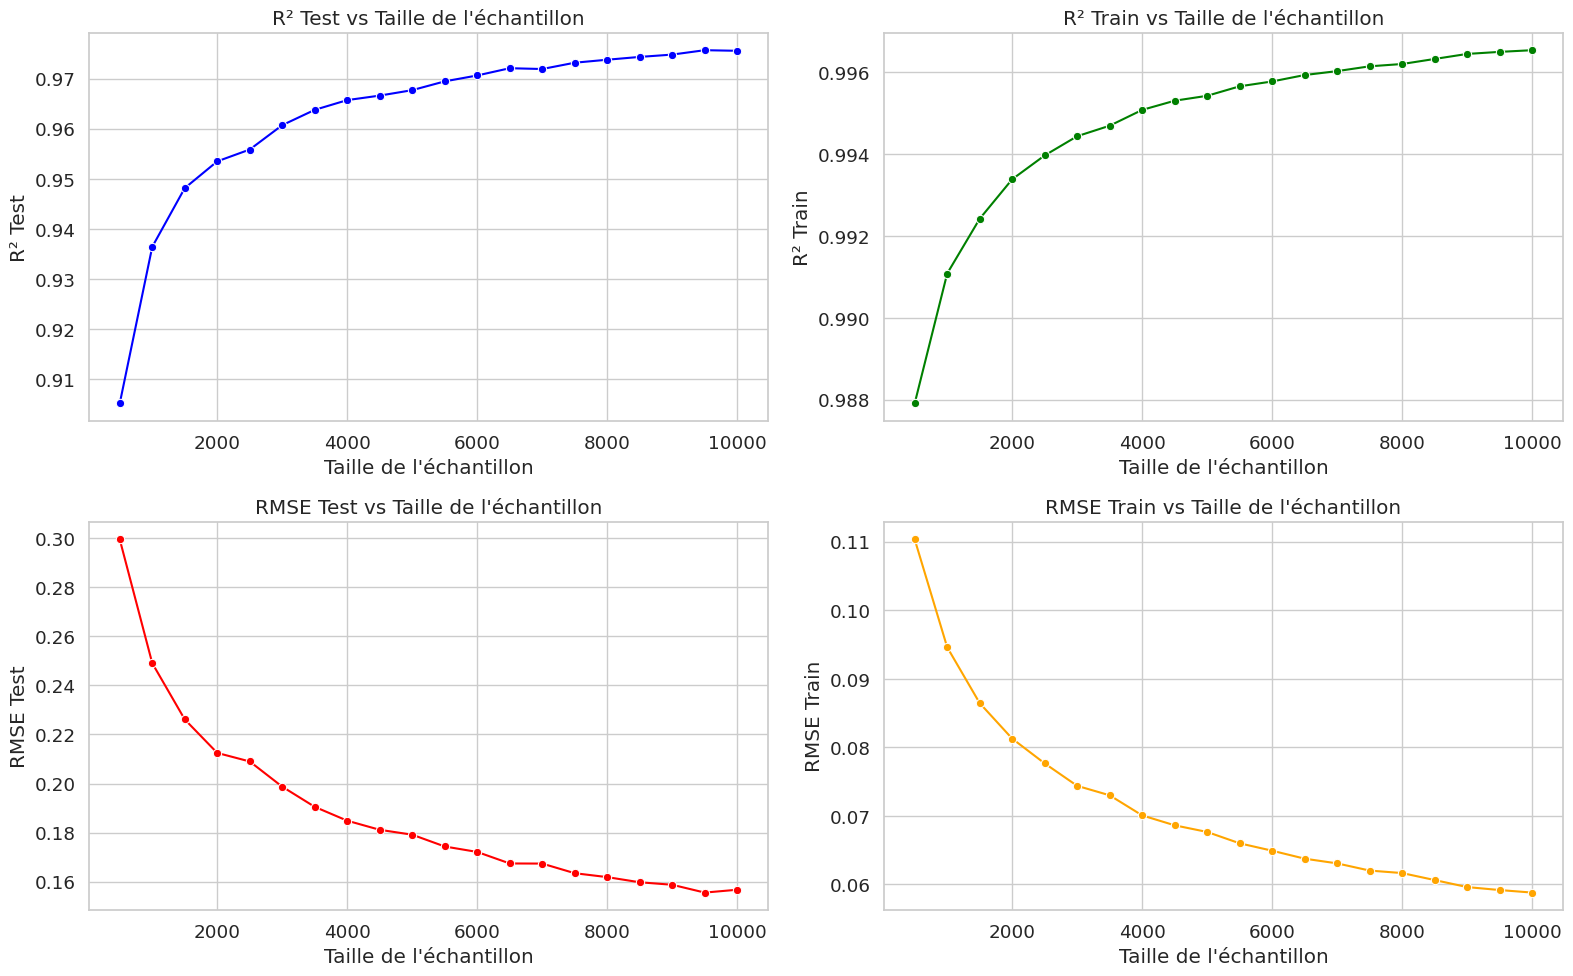

In [8]:
# Données
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Paramètres
sample_sizes = list(range(500, 10001, 500))
n_repeats = 20

# Dictionnaire des résultats
results_rf = {
    'sample_size': [],
    'R2_test': [], 'RMSE_test': [],
    'R2_train': [], 'RMSE_train': []
}

# Boucle d’entraînement
for size in sample_sizes:
    r2_test_scores, rmse_test_scores = [], []
    r2_train_scores, rmse_train_scores = [], []

    for _ in range(n_repeats):
        # Échantillonnage aléatoire
        indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[indices]
        y_sample = y.iloc[indices]

        # Séparation train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X_sample, y_sample, test_size=0.2, random_state=None
        )

        # Modèle
        modelRF = RandomForestRegressor(random_state=42)
        modelRF.fit(X_train, y_train)

        # Prédictions test
        y_pred_test = modelRF.predict(X_test)
        r2_test_scores.append(r2_score(y_test, y_pred_test))
        rmse_test_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

        # Prédictions train
        y_pred_train = modelRF.predict(X_train)
        r2_train_scores.append(r2_score(y_train, y_pred_train))
        rmse_train_scores.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))

    # Moyenne des résultats
    results_rf['sample_size'].append(size)
    results_rf['R2_test'].append(np.mean(r2_test_scores))
    results_rf['RMSE_test'].append(np.mean(rmse_test_scores))
    results_rf['R2_train'].append(np.mean(r2_train_scores))
    results_rf['RMSE_train'].append(np.mean(rmse_train_scores))

# Résultats en DataFrame
df_results_rf = pd.DataFrame(results_rf)
print("Résultats moyens Random Forest Regressor :")
print(df_results_rf)

# 🔽 Visualisation avec 4 graphiques
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(16, 10))

# R² Test
plt.subplot(2, 2, 1)
sns.lineplot(data=df_results_rf, x='sample_size', y='R2_test', marker='o', color='blue')
plt.title('R² Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Test')
plt.grid(True)

# R² Train
plt.subplot(2, 2, 2)
sns.lineplot(data=df_results_rf, x='sample_size', y='R2_train', marker='o', color='green')
plt.title('R² Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Train')
plt.grid(True)

# RMSE Test
plt.subplot(2, 2, 3)
sns.lineplot(data=df_results_rf, x='sample_size', y='RMSE_test', marker='o', color='red')
plt.title('RMSE Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Test')
plt.grid(True)

# RMSE Train
plt.subplot(2, 2, 4)
sns.lineplot(data=df_results_rf, x='sample_size', y='RMSE_train', marker='o', color='orange')
plt.title('RMSE Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Train')
plt.grid(True)

plt.tight_layout()
plt.show()


**ARBRE DE DECISION**

Résultats moyens Decision Tree Regressor :
    sample_size   R2_test  RMSE_test  R2_train    RMSE_train
0           500  0.798428   0.445367       1.0  7.913104e-17
1          1000  0.837166   0.395871       1.0  1.207784e-16
2          1500  0.868611   0.362073       1.0  1.122505e-16
3          2000  0.879142   0.342231       1.0  1.318390e-16
4          2500  0.890052   0.328258       1.0  1.289268e-16
5          3000  0.897126   0.319677       1.0  1.336043e-16
6          3500  0.900060   0.315509       1.0  1.414683e-16
7          4000  0.907142   0.303788       1.0  1.355551e-16
8          4500  0.910155   0.299287       1.0  1.467421e-16
9          5000  0.911387   0.297214       1.0  1.509690e-16
10         5500  0.916180   0.288950       1.0  1.426231e-16
11         6000  0.916119   0.290602       1.0  1.552468e-16
12         6500  0.918164   0.285343       1.0  1.554348e-16
13         7000  0.917831   0.285594       1.0  1.544970e-16
14         7500  0.921799   0.279319      

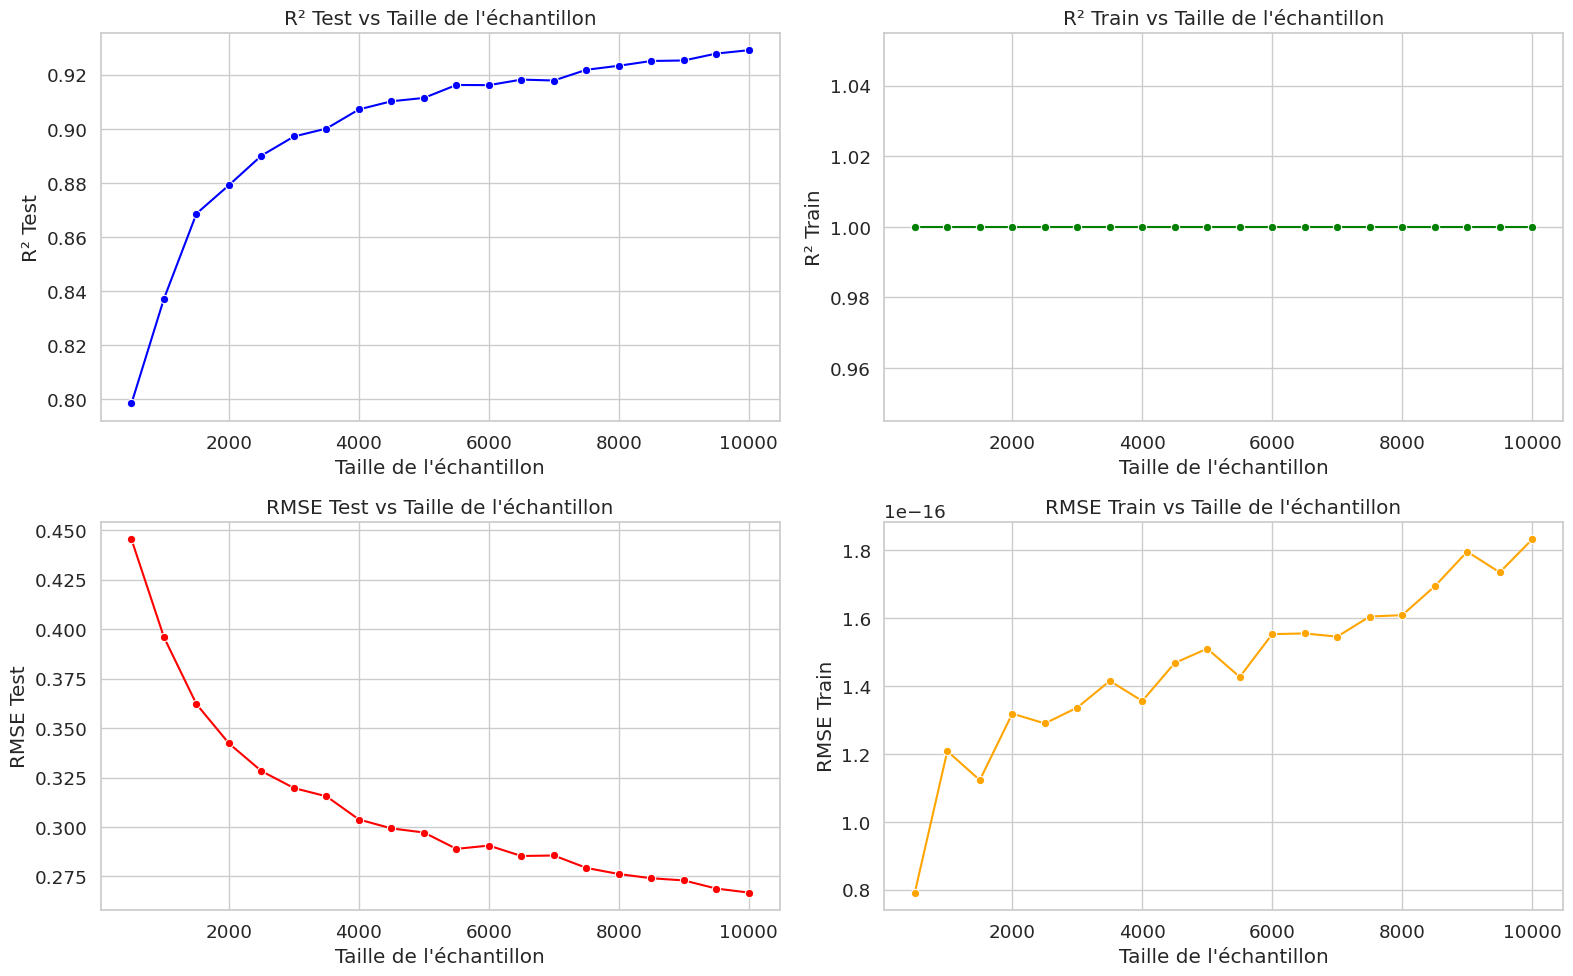

In [9]:
# Données
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Paramètres
sample_sizes = list(range(500, 10001, 500))
n_repeats = 20

# Résultats
results_tree = {
    'sample_size': [],
    'R2_test': [], 'RMSE_test': [],
    'R2_train': [], 'RMSE_train': []
}

# Boucle principale
for size in sample_sizes:
    r2_test_scores, rmse_test_scores = [], []
    r2_train_scores, rmse_train_scores = [], []

    for _ in range(n_repeats):
        # Échantillonnage aléatoire
        indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[indices]
        y_sample = y.iloc[indices]

        # Séparation train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X_sample, y_sample, test_size=0.2, random_state=None
        )

        # Modèle
        model_tree = DecisionTreeRegressor(random_state=42)
        model_tree.fit(X_train, y_train)

        # Prédictions test
        y_pred_test = model_tree.predict(X_test)
        r2_test_scores.append(r2_score(y_test, y_pred_test))
        rmse_test_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

        # Prédictions train
        y_pred_train = model_tree.predict(X_train)
        r2_train_scores.append(r2_score(y_train, y_pred_train))
        rmse_train_scores.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))

    # Moyennes
    results_tree['sample_size'].append(size)
    results_tree['R2_test'].append(np.mean(r2_test_scores))
    results_tree['RMSE_test'].append(np.mean(rmse_test_scores))
    results_tree['R2_train'].append(np.mean(r2_train_scores))
    results_tree['RMSE_train'].append(np.mean(rmse_train_scores))

# DataFrame résultats
df_results_tree = pd.DataFrame(results_tree)
print("Résultats moyens Decision Tree Regressor :")
print(df_results_tree)

# 🔽 Visualisation 4 graphiques
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(16, 10))

# R² Test
plt.subplot(2, 2, 1)
sns.lineplot(data=df_results_tree, x='sample_size', y='R2_test', marker='o', color='blue')
plt.title('R² Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Test')
plt.grid(True)

# R² Train
plt.subplot(2, 2, 2)
sns.lineplot(data=df_results_tree, x='sample_size', y='R2_train', marker='o', color='green')
plt.title('R² Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Train')
plt.grid(True)

# RMSE Test
plt.subplot(2, 2, 3)
sns.lineplot(data=df_results_tree, x='sample_size', y='RMSE_test', marker='o', color='red')
plt.title('RMSE Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Test')
plt.grid(True)

# RMSE Train
plt.subplot(2, 2, 4)
sns.lineplot(data=df_results_tree, x='sample_size', y='RMSE_train', marker='o', color='orange')
plt.title('RMSE Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Train')
plt.grid(True)

plt.tight_layout()
plt.show()


**SUPPORT VECTOR REGRESSION**

Résultats moyens Support Vector Regression :
    sample_size   R2_test  RMSE_test  R2_train  RMSE_train
0           500  0.990220   0.095879  0.994200    0.076338
1          1000  0.993572   0.079837  0.995643    0.065961
2          1500  0.994764   0.072026  0.996081    0.062425
3          2000  0.995511   0.066893  0.996275    0.061235
4          2500  0.995921   0.063121  0.996530    0.058763
5          3000  0.996175   0.061282  0.996736    0.056975
6          3500  0.996210   0.061219  0.996907    0.055506
7          4000  0.996572   0.058547  0.996979    0.054757
8          4500  0.996843   0.056414  0.997092    0.053864
9          5000  0.996609   0.058093  0.997215    0.052642
10         5500  0.996856   0.055508  0.997269    0.052209
11         6000  0.996941   0.055052  0.997272    0.052184
12         6500  0.997276   0.052385  0.997361    0.051290
13         7000  0.997272   0.052254  0.997392    0.051072
14         7500  0.997225   0.052532  0.997495    0.050119
15         

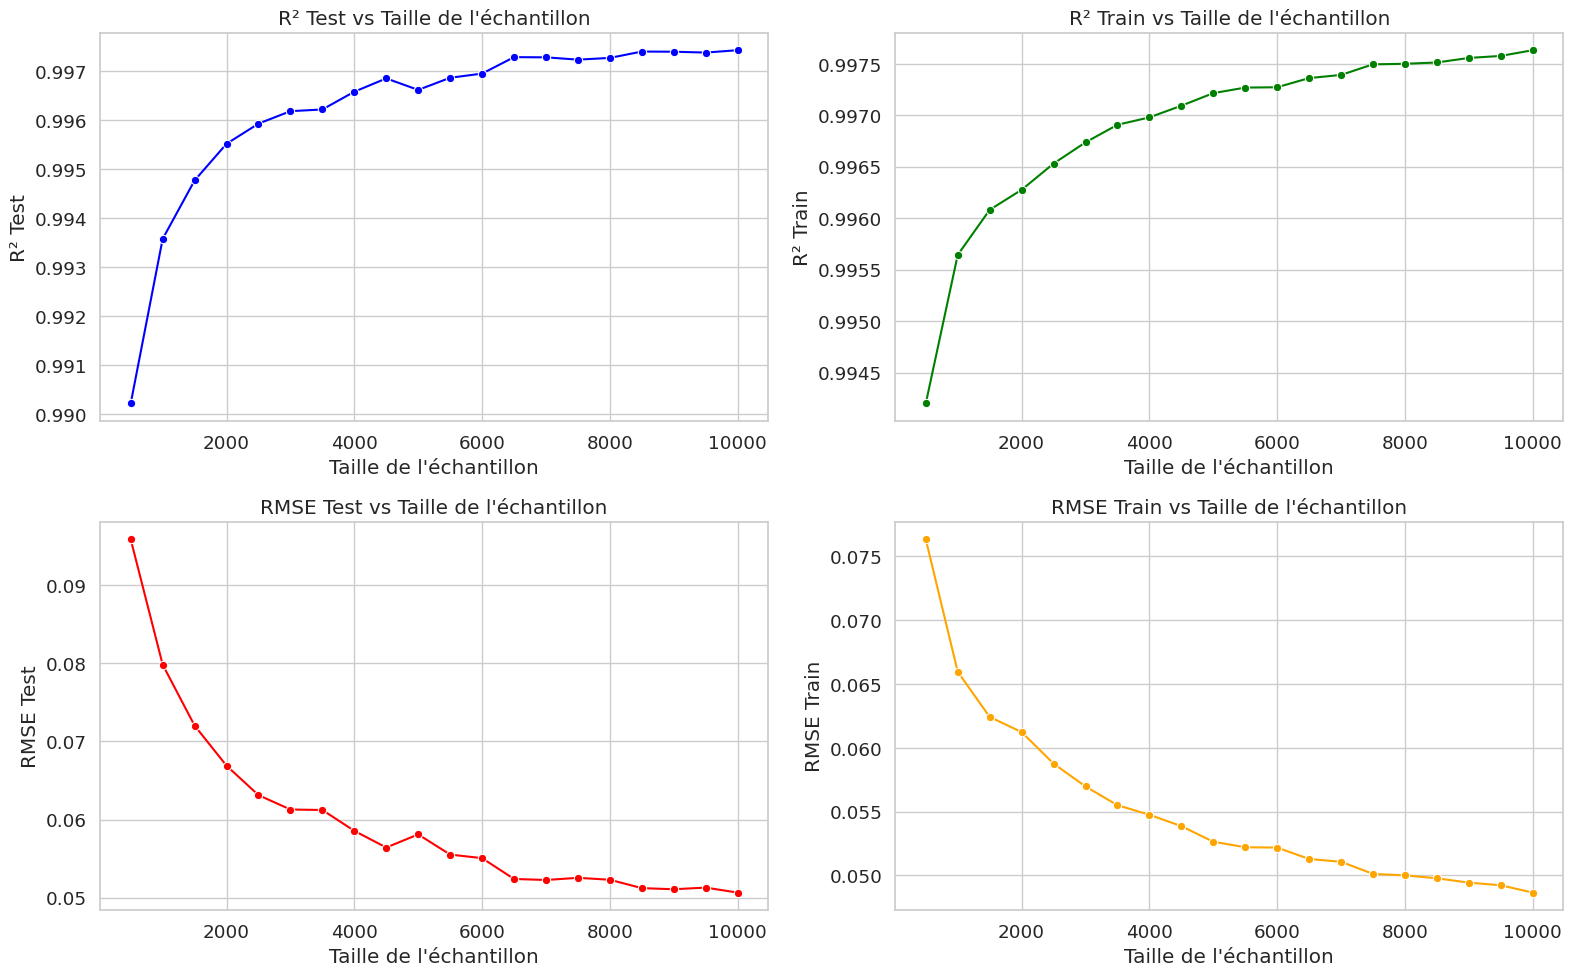

In [11]:
# Données
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Paramètres
sample_sizes = list(range(500, 10001, 500))
n_repeats = 20

# Résultats
results_svr = {
    'sample_size': [],
    'R2_test': [], 'RMSE_test': [],
    'R2_train': [], 'RMSE_train': []
}

# Boucle principale
for size in sample_sizes:
    r2_test_scores, rmse_test_scores = [], []
    r2_train_scores, rmse_train_scores = [], []

    for _ in range(n_repeats):
        # Échantillonnage aléatoire
        indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[indices]
        y_sample = y.iloc[indices]

        # Séparation train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X_sample, y_sample, test_size=0.2, random_state=None
        )

        # Modèle SVR
        modelSVR = SVR(kernel='rbf', C=1.0, epsilon=0.1)
        modelSVR.fit(X_train, y_train)

        # Prédictions test
        y_pred_test = modelSVR.predict(X_test)
        r2_test_scores.append(r2_score(y_test, y_pred_test))
        rmse_test_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

        # Prédictions train
        y_pred_train = modelSVR.predict(X_train)
        r2_train_scores.append(r2_score(y_train, y_pred_train))
        rmse_train_scores.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))

    # Moyennes
    results_svr['sample_size'].append(size)
    results_svr['R2_test'].append(np.mean(r2_test_scores))
    results_svr['RMSE_test'].append(np.mean(rmse_test_scores))
    results_svr['R2_train'].append(np.mean(r2_train_scores))
    results_svr['RMSE_train'].append(np.mean(rmse_train_scores))

# DataFrame résultats
df_results_svr = pd.DataFrame(results_svr)
print("Résultats moyens Support Vector Regression :")
print(df_results_svr)

# 🔽 Visualisation 4 graphiques
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(16, 10))

# R² Test
plt.subplot(2, 2, 1)
sns.lineplot(data=df_results_svr, x='sample_size', y='R2_test', marker='o', color='blue')
plt.title('R² Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Test')
plt.grid(True)

# R² Train
plt.subplot(2, 2, 2)
sns.lineplot(data=df_results_svr, x='sample_size', y='R2_train', marker='o', color='green')
plt.title('R² Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Train')
plt.grid(True)

# RMSE Test
plt.subplot(2, 2, 3)
sns.lineplot(data=df_results_svr, x='sample_size', y='RMSE_test', marker='o', color='red')
plt.title('RMSE Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Test')
plt.grid(True)

# RMSE Train
plt.subplot(2, 2, 4)
sns.lineplot(data=df_results_svr, x='sample_size', y='RMSE_train', marker='o', color='orange')
plt.title('RMSE Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Train')
plt.grid(True)

plt.tight_layout()
plt.show()
